# **Building Your First Model**

##**Getting a GPU Deep Learning Server**

- **Google Colab**
- **Gradient**
- **Kaggle Kernel**

## **Imports**

In [ ]:
# import fastai 
from fastai.vision.all import * 
from fastai.vision.widgets import *

## **Get the Data**

**Unzip the files**

In [ ]:
import zipfile

In [ ]:
# path_to_zip_file = '/content/drive/MyDrive/Colab Notebooks/NITDA_AI_Class/Deep_Learning/Computer_Vision/Dora.zip' #

# with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
#     zip_ref.extractall('/content/drive/MyDrive/Colab Notebooks/NITDA_AI_Class/Deep_Learning/Computer_Vision/Images/Dora')

In [ ]:
# path_to_zip_file = '/content/drive/MyDrive/Colab Notebooks/NITDA_AI_Class/Deep_Learning/Computer_Vision/Favour.zip' #

# with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
#     zip_ref.extractall('/content/drive/MyDrive/Colab Notebooks/NITDA_AI_Class/Deep_Learning/Computer_Vision/Images/Favour')

**Create a `Path` object that points to the dataset folder**

- This provides additional features

In [ ]:
path = Path('/content/drive/MyDrive/Colab Notebooks/NITDA_AI_Class/Deep_Learning/Computer_Vision/Images') #Create a path to the Train folder

In [ ]:
#Check the content of the folder
path.ls()

(#2) [Path('/content/drive/MyDrive/Colab Notebooks/NITDA_AI_Class/Deep_Learning/Computer_Vision/Images/Dora'),Path('/content/drive/MyDrive/Colab Notebooks/NITDA_AI_Class/Deep_Learning/Computer_Vision/Images/Favour')]

In [ ]:
#Check the number of images in the folders
len(path.ls()[1].ls())

50

In [ ]:
path.ls()[0].ls()[0]

Path('/content/drive/MyDrive/Colab Notebooks/NITDA_AI_Class/Deep_Learning/Computer_Vision/Images/Dora/IMG_1332.jpg')

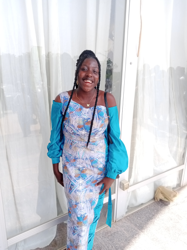

In [ ]:
#Open the images to have a look at what you have
img = Image.open(path.ls()[1].ls()[0]) #put path to image
img.to_thumb(250,250)

In [ ]:
#Check the shape of the images
img.shape

(4160, 3120)

##**Create a DataLoaders**

DataLoaders is an object that contains a training set (the images used to create a model) and a validation set (the images used to check the accuracy of a model -- not used during training)

In [ ]:
#Create the template that helps build the dataloaders
images = DataBlock(
          blocks = (ImageBlock, CategoryBlock),
          get_items = get_image_files,
          splitter = RandomSplitter(valid_pct = 0.2, seed = 42),
          get_y = parent_label,
          item_tfms = RandomResizedCrop(224, min_scale = 0.75)
          )

In [ ]:
#Create the dataloaders
dls = images.dataloaders(path, bs=32)

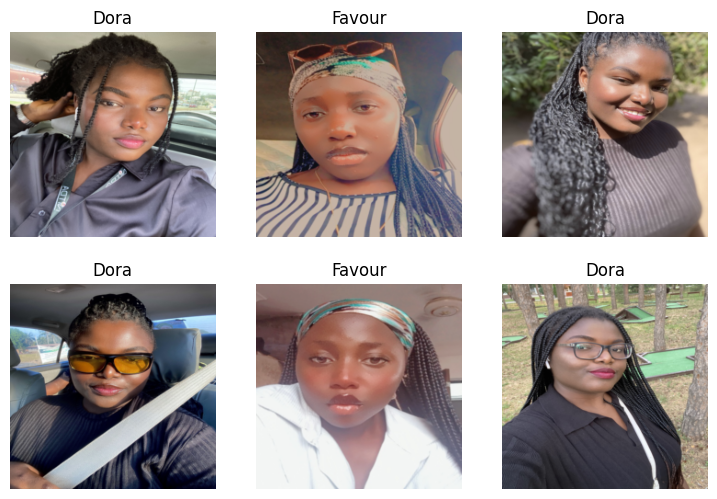

In [ ]:
#Show a batch
dls.show_batch(max_n=6)

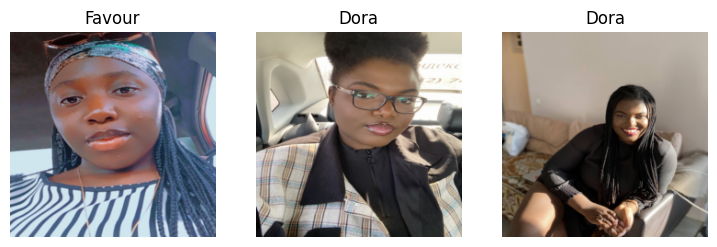

In [ ]:
dls.train.show_batch(max_n = 3)

#### **Here what each of the `DataBlock` parameters means:**

    blocks=(ImageBlock, CategoryBlock),

**The inputs to our model are images, and the outputs are categories (in this case, "Dora" or "Favour")**

    get_items=get_image_files, 

**To find all the inputs to our model, run the `get_image_files` function (which returns a list of all image files in a path).**

    splitter=RandomSplitter(valid_pct=0.2, seed=42),

**Split the data into training and validation sets randomly, using 20% of the data for the validation set.**

    get_y=parent_label,

**The labels (`y` values) is the name of the `parent` of each file (i.e. the name of the folder they're in, which will be Dora or Favour).**

    item_tfms = RandomResizedCrop(224, min_scale = 0.75)

**Before training, randomly resize each image to 224x224 pixels by "cropping" it (ensuring you have at least 75% of the original image).**

-----------------------------------

**Now we're ready to train our model.**

**The fastest widely used computer vision model is `resnet18`.**

**You can train this in a few minutes, even on a CPU! (On a GPU, it generally takes under 10 seconds...)**

--------------------------------------

**`fastai` comes with a helpful `fine_tune() ` method which automatically uses best practices for fine tuning a pre-trained model, so we'll use that.**

**"Fine-tuning"** a model means that we're starting with a model someone else has trained using some other dataset (called the pretrained model), and adjusting the weights a little bit so that the model learns to recognise your particular dataset. 

In this case, the pretrained model was trained to recognise photos in `imagenet`, a widely-used computer vision dataset with images covering 1000 categories)

##**Create the Model and Fine-Tune** 

In [ ]:
model = vision_learner(dls, resnet18, metrics=error_rate)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
# model.lr_find()

In [ ]:
model.fine_tune(10, 1e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.136949,1.020876,0.500000,00:46


epoch,train_loss,valid_loss,error_rate,time
0,0.776475,0.601438,0.388889,00:48
1,0.617529,0.345853,0.129630,00:46
2,0.514081,0.274490,0.074074,00:48
3,0.420195,0.202662,0.074074,00:47
4,0.346516,0.146460,0.074074,00:47
5,0.296312,0.119876,0.055556,00:46


epoch,train_loss,valid_loss,error_rate,time
0,0.776475,0.601438,0.388889,00:48
1,0.617529,0.345853,0.129630,00:46
2,0.514081,0.274490,0.074074,00:48
3,0.420195,0.202662,0.074074,00:47
4,0.346516,0.146460,0.074074,00:47
5,0.296312,0.119876,0.055556,00:46
6,0.249260,0.080828,0.037037,00:46
7,0.213790,0.068165,0.037037,00:46
8,0.196885,0.059908,0.037037,00:46
9,0.172768,0.053714,0.018519,00:45


**NB:** `accuracy = 1 - error_rate`

  - Accuracy = 0.9814 = 98.14%

## **Evaluate the Performance**

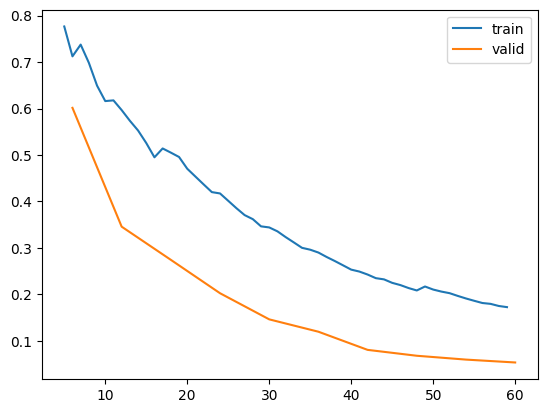

In [ ]:
model.recorder.plot_loss()

**Check the confusion matrix**

In [ ]:
interp= ClassificationInterpretation.from_learner(model)

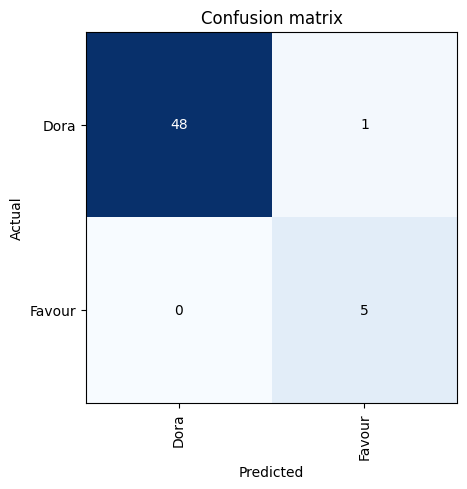

In [ ]:
interp.plot_confusion_matrix()

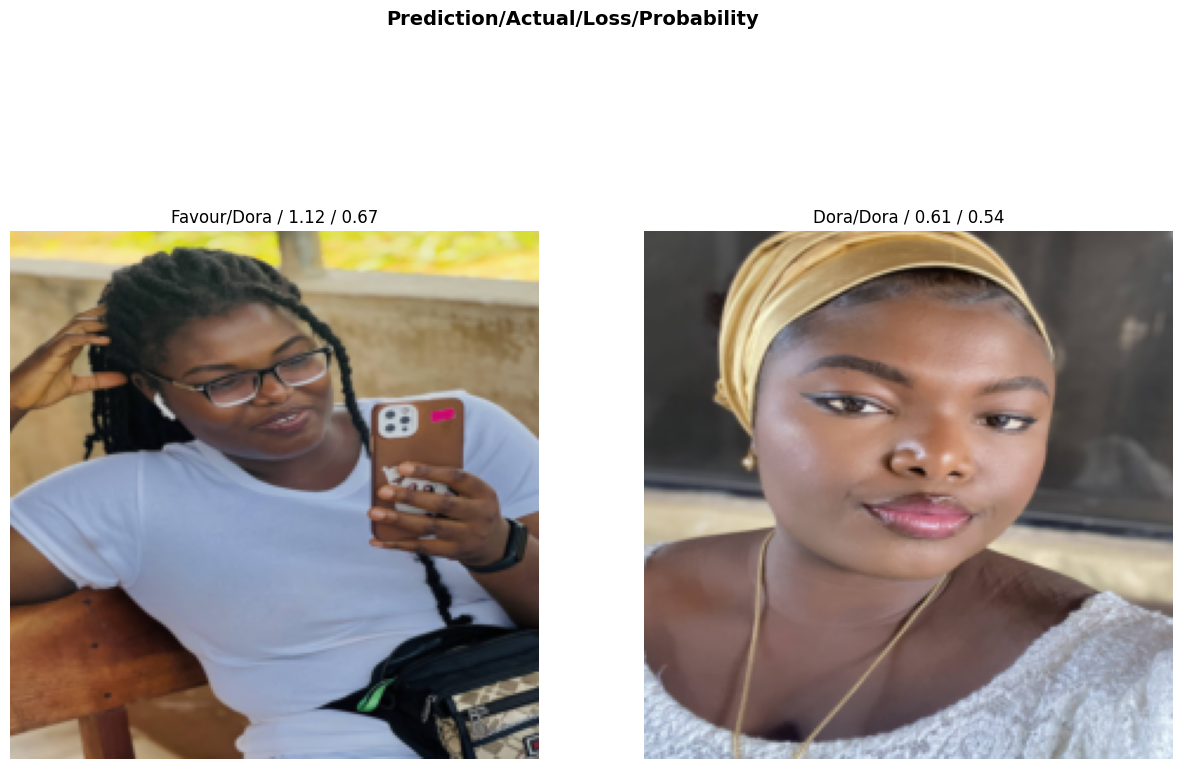

In [ ]:
interp.plot_top_losses(2, figsize=(15,10))

**Calculate other useful metrics**

In [ ]:
upp, low, *_ = interp.confusion_matrix()

tn, fp = upp[0], upp[1]
fn, tp = low[0], low[1]

In [ ]:
sensitivity = tp/(tp + fn)

specificity = tn/(fp + tn)

f1_score = (2*tp)/((2*tp) + fp + fn)

In [ ]:
print(f'sensitivity: {sensitivity}\nspecificity: {specificity}\nF1 Score: {f1_score}')

sensitivity: 1.0
specificity: 0.9795918367346939
F1 Score: 0.9090909090909091


**Test the model**

In [ ]:
img_obj = PILImage.create('path to an image') #Replace the with the path to your image

In [ ]:
pred,_,probs = model.predict(img_obj)

print(f"This is a: {pred}.")
print(f"Probability it's {pred}: {probs[0]:.4f}")

### **Save your model**

In [ ]:
model.export('model.pkl')

## **Make New Predictions**

**Load the model**

In [ ]:
model = load_learner("path to the model")

**Create buttons that will allow you to upload an image and print the result**

In [ ]:
btn_upload = widgets.FileUpload()
out_pl = widgets.Output()
lbl_pred = widgets.Label()
lbl_pred2 = widgets.Label()
btn_run = widgets.Button(description = 'Who is this?')

In [ ]:
#Function that does prediction once the button is clicked
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(250,250))
    pred, pred_idx, prob = model.predict(img)
    percent_prob = (prob[pred_idx]) * 100
    lbl_pred.value = f'The picture you uploaded is {pred}'
    lbl_pred2.value = f'I am {percent_prob:.02f}% confident that the image is {pred}'

In [ ]:
btn_run.on_click(on_click_classify)

VBox([widgets.Label('Upload a Picture'), 
        btn_upload, btn_run, out_pl, lbl_pred, lbl_pred2])

## **Getting Data From the Internet**

#### **Downloading Images**

**Search for the image url**

**NB:** `search_images_images` depends on duckduckgo.com, which doesn't always return correct responses.

If you get a **JSON error**, just try running it again (it may take a couple of tries).

In [ ]:
#These are needed for dowloading the images
from io import StringIO, BytesIO
from urllib.error import URLError,HTTPError

In [ ]:
###### DON'T EDIT ############
# Create the function that allows you to search for images of DuckDuckGo
def search_images_ddg(term, max_images=200):
    "Search for `term` with DuckDuckGo and return a unique urls of about `max_images` images"
    assert max_images<1000
    url = 'https://duckduckgo.com/'
    res = urlread(url,data={'q':term})
    searchObj = re.search(r'vqd=([\d-]+)\&', res)
    assert searchObj
    requestUrl = url + 'i.js'
    params = dict(l='us-en', o='json', q=term, vqd=searchObj.group(1), f=',,,', p='1', v7exp='a')
    urls,data = set(),{'next':1}
    headers = dict(referer='https://duckduckgo.com/')
    while len(urls)<max_images and 'next' in data:
        try:
            res = urlread(requestUrl, data=params, headers=headers)
            data = json.loads(res) if res else {}
            urls.update(L(data['results']).itemgot('image'))
            requestUrl = url + data['next']
        except (URLError,HTTPError): pass
        time.sleep(1)
    return L(urls)[:max_images]

In [ ]:
urls = search_images_ddg('bird photos', max_images=5)
urls[0]

'http://wallpapercave.com/wp/sk6rKA7.jpg'

**Download a URL and take a look at it**

In [ ]:
from fastdownload import download_url

In [ ]:
dest = '/content/image.jpg' #Path the save the image
download_url(urls[0], dest, show_progress=False)

Path('/content/image.jpg')

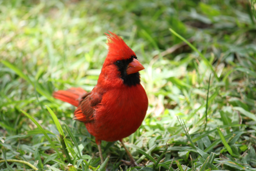

In [ ]:
im = Image.open(dest)
im.to_thumb(256,256)

Did you get a reasonable result?

**Download more**

In [ ]:
from time import sleep

In [ ]:
searches = 'forest','bird','train' #Categories you want to download

#Path to save the images
image_path = Path('/content/drive/MyDrive/Colab Notebooks/NITDA_AI_Class/Deep_Learning/Computer_Vision/')

In [ ]:
#A loop to download the images and resize them
for o in searches:
    dest = (image_path/o)
    dest.mkdir(exist_ok=True, parents=True)
    urls = search_images_ddg(f'{o} photo', max_images = 5)
    download_images(dest, urls=urls)
    sleep(5)  # Pause between searches to avoid over-loading server
    resize_images(path/o, max_size=400, dest=path/o)

**NOTE:** Some photos might not download correctly which could cause our model training to fail, so we'll remove them:

In [ ]:
#Check for images that are broken
failed = verify_images(get_image_files(image_path))

len(failed)

In [ ]:
#Delete broken images if any
failed.map(Path.unlink)

## **What if your dataset is in a different format?**

### **Create a function to return the path to all the images and put them in a dataframe**

In [ ]:
def get_img_paths(path):
    paths = []
    labels = []
    for label in os.listdir(path):
        img_dir = os.path.join(path, label)
        for img in os.listdir(img_dir):
            paths.append(os.path.join(img_dir, img))
            labels.append(label)

    return pd.DataFrame({'image_path':paths, 'label':labels})

In [ ]:
data = get_img_paths(path)
data.head()

### **Create the DataLoaders**

In [ ]:
def get_x(r): 
  return image_path/r['image_path']


def get_y(r): 
  return r['label']

In [ ]:
images = DataBlock(
                  blocks = (ImageBlock, CategoryBlock),
                  get_x = get_x,
                  get_y = get_y,
                  splitter = RandomSplitter(valid_pct=0.2, seed=42),
                  item_tfms = [Resize(224, method='squish')]
                  )

## **Jargons**

**Deep learning vocabulary**

- **|Label|** The data that we're trying to predict, such as "dog" or "cat"

- **|Architecture|** The _template_ of the model that we're trying to fit; the actual mathematical function that we're passing the input data and parameters to

- **|Model|** The combination of the architecture with a particular set of parameters.

- **|Parameters|** The values in the model that change what task it can do, and are updated through model training.

- **|Fit|** Update the parameters of the model such that the predictions of the model using the input data match the target labels.

- **|Train|** A synonym for _fit_

- **|Pretrained model|** A model that has already been trained, generally using a large dataset, and will be fine-tuned.

- **|Fine-tune|** Update a pretrained model for a different task.

- **|Epoch|** One complete pass through the input data.

- **|Loss|** A measure of how good the model is, chosen to drive training via SGD.

- **|Metric|** A measurement of how good the model is, using the validation set, chosen for human consumption.

- **|Validation set|** A set of data held out from training, used only for measuring how good the model is.

- **|Training set|** The data used for fitting the model; does not include any data from the validation set.

- **|Overfitting|** Training a model in such a way that it _remembers_ specific features of the input data, rather than generalizing well to data not seen during training.

- **|CNN|** Convolutional neural network; a type of neural network that works particularly well for computer vision tasks
